In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize 
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF
from textblob import TextBlob
from spellchecker import SpellChecker
import emoji
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.chunk import ne_chunk
import datetime
import math
from datetime import datetime

In [2]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mishkaasli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('Desktop/Bitcoin_tweets_updated.csv')
date_df1 = pd.read_csv('date_df_1.csv')
date_df1

date                                   tokenized_text_1
0   6/20/21  'bitcoin' 'is' 'a' 'remarkable' 'cryptographic...
1   6/21/21  'if' 'you' 'ever' 'wished' 'you' 'couldve' 'bo...
2   6/22/21  'theres' 'beauty' 'in' 'simplicity' 'and' 'is'...
3   6/23/21  'and' 'crypto' 'exchange' 'ftx' 'is' 'now' 'a'...
4   7/16/21  'ground' 'zero' 'masquerading' 'as' 'an' 'ias'...
5   7/17/21  'mr' 'and' 'i' 'watched' 'my' 'recording' 'of'...
6   7/18/21  'observer' 'webinar' 'to' 'explore' 'whether' ...
7   7/19/21  'maryland' 'health' 'officials' 'say' 'they' '...
8    7/2/21  'tweet' 'what' 'happened' 'in' 'crypto' 'this'...
9   7/20/21  'make' 'sure' 'to' 'receive' 'your' 'second' '...
10  7/21/21  'among' 'the' 'of' 'adults' 'residing' 'in' 'c...
11  7/22/21  'will' 'be' 'reserved' 'for' 'administering' '...
12  7/23/21  'rdif' 'argentine' 'health' 'ministry' 'agree'...
13  7/24/21  'insane' 'news' 'amazon' 'moves' 'into' 'payme...
14  7/25/21  'vermont' 'is' 'fourth' 'state' 'to' 'target' ...
15  7/26/21  'kaseya' 'denies' 'paying' 'million' 'bitcoin'...
16  7/27/21  'the' 'bitcoin' 'bulls' 'may' 'be' 'back' 'as'...
17  7/28/21  'new' 'jersey' 'gives' 'blockfi' 'another' 'mo...
18  7/29/21  'lets' 'discuss' 'the' 'latest' 'news' 'paypal...
19   7/3/21  'my' 'discussion' 'with' 'was' 'a' 'deep' 'rev...
20  7/30/21  'just' 'smashed''forty' 'two' 'thousand' 'unit...
21   7/4/21  'nach' 'kryptocrackdown' 'in' 'chinaminingdiff...
22   7/5/21  'barclays' 'just' 'wants' 'to' 'keep' 'you' 's...
23  8/14/21  'will' 'close' 'the' 'week' 'above''you' 'migh...
24  8/15/21  'will' 'close' 'the' 'week' 'above' 'a' 'modes...
25  8/16/21  'crypto' 'community' 'remembers' 'how' 'nixon'...
26  8/17/21  'asia' 'im' 'going' 'to' 'ask' 'you' 'nicely' ...
27  8/18/21  'it' 'has' 'been' 'an' 'honor' 'tweeting' 'for...
28  8/19/21  'finish' 'this' 'sentence' 'this' 'weekend' 'w...
29  8/20/21  'all' 'money' 'will' 'flow' 'to''i' 'agree' 'w...
30  8/21/21  'happy' 'there' 'will' 'only' 'ever' 'be' 'mil...
31   8/4/21  'casino' 'via' 'take' 'a' 'look' 'at' 'some' '...
32   8/5/21  'market' 'conditions' 'today' 'dji' 'sampp' 'r...
33   8/6/21  'youtube' 'star' 'ksi' 'is' 'knees' 'deep' 'in...
34   8/7/21  'the' 'fact' 'that' 'lefties' 'hate' 'on' 'cry...
35   8/8/21  'as' 'we' 'come' 'into' 'the' 'weekly' 'close'...
36   8/9/21  'amc' 'will' 'accept' 'for' 'movie' 'tickets' ...

In [4]:
model_df = pd.read_csv('modeling_df_1.csv')
model_df

Unnamed: 0           0                  1               2  \
0            0   'bitcoin'               'is'             'a'   
1            1        'if'              'you'          'ever'   
2            2    'theres'           'beauty'            'in'   
3            3       'and'           'crypto'      'exchange'   
4            4    'ground'             'zero'  'masquerading'   
5            5        'mr'              'and'             'i'   
6            6  'observer'          'webinar'            'to'   
7            7  'maryland'           'health'     'officials'   
8            8     'tweet'             'what'      'happened'   
9            9      'make'             'sure'            'to'   
10          10     'among'              'the'            'of'   
11          11      'will'               'be'      'reserved'   
12          12      'rdif'        'argentine'        'health'   
13          13    'insane'             'news'        'amazon'   
14          14   'vermont'               'is'        'fourth'   
15          15    'kaseya'           'denies'        'paying'   
16          16       'the'          'bitcoin'         'bulls'   
17          17       'new'           'jersey'         'gives'   
18          18      'lets'          'discuss'           'the'   
19          19        'my'       'discussion'          'with'   
20          20      'just'   'smashed''forty'           'two'   
21          21      'nach'  'kryptocrackdown'            'in'   
22          22  'barclays'             'just'         'wants'   
23          23      'will'            'close'           'the'   
24          24      'will'            'close'           'the'   
25          25    'crypto'        'community'     'remembers'   
26          26      'asia'               'im'         'going'   
27          27        'it'              'has'          'been'   
28          28    'finish'             'this'      'sentence'   
29          29       'all'            'money'          'will'   
30          30     'happy'            'there'          'will'   
31          31    'casino'              'via'          'take'   
32          32    'market'       'conditions'         'today'   
33          33   'youtube'             'star'           'ksi'   
34          34       'the'             'fact'          'that'   
35          35        'as'               'we'          'come'   
36          36       'amc'             'will'        'accept'   

                          3                            4              5  \
0              'remarkable'              'cryptographic'  'achievement'   
1                  'wished'                        'you'      'couldve'   
2              'simplicity'                        'and'           'is'   
3                     'ftx'                         'is'          'now'   
4                      'as'                         'an'          'ias'   
5                 'watched'                         'my'    'recording'   
6                 'explore'                    'whether'         'more'   
7                     'say'                       'they'         'will'   
8                      'in'                     'crypto'         'this'   
9                 'receive'                       'your'       'second'   
10                 'adults'                   'residing'           'in'   
11                    'for'              'administering'          'the'   
12               'ministry'                      'agree'           'to'   
13                  'moves'                       'into'     'payments'   
14                  'state'                         'to'       'target'   
15                'million'                    'bitcoin'   'ransom''is'   
16                    'may'                         'be'         'back'   
17                'blockfi'                    'another'        'month'   
18                 'latest'                       'news'       'paypal'   
19                    'was'      

In [5]:
model_df2 = model_df.values.tolist()
model_df2

[[0,
  "'bitcoin'",
  "'is'",
  "'a'",
  "'remarkable'",
  "'cryptographic'",
  "'achievement'",
  "'and'",
  "'the'",
  "'ability'",
  "'to'",
  "'create'",
  "'something'",
  "'that'",
  "'is'",
  "'not'",
  "'duplicable'",
  "'in'",
  "'the'",
  "'digital'",
  "'world'",
  "'has'",
  "'enormous'",
  "'value'",
  "'former'",
  "'ceo'",
  "'of'",
  "'google''all'",
  "'hypespeculation'",
  "'is'",
  "'doing'",
  "'is'",
  "'drawing'",
  "'in'",
  "'retail'",
  "'before'",
  "'the'",
  "'mother'",
  "'of'",
  "'all'",
  "'crashes'",
  "'when'",
  "'falls'",
  "'from'",
  "'trillions'",
  "'main'",
  "'street'",
  "'losses'",
  "'will'",
  "'approach'",
  "'the'",
  "'size'",
  "'of'",
  "'countries''are'",
  "'prices'",
  "'finally'",
  "'stable''death'",
  "'cross'",
  "'is'",
  "'here'",
  "'are'",
  "'you'",
  "'worried'",
  "'will'",
  "'btc'",
  "'crash'",
  "'another'",
  "'or'",
  "'is'",
  "'it'",
  "'about'",
  "'to'",
  "'rise'",
  "'from'",
  "'the'",
  "'ashes''do'",
  "'yo

In [6]:
model_series = pd.Series(model_df2)
model_series = model_series.replace('"','')
(model_series[0])

[0,
 "'bitcoin'",
 "'is'",
 "'a'",
 "'remarkable'",
 "'cryptographic'",
 "'achievement'",
 "'and'",
 "'the'",
 "'ability'",
 "'to'",
 "'create'",
 "'something'",
 "'that'",
 "'is'",
 "'not'",
 "'duplicable'",
 "'in'",
 "'the'",
 "'digital'",
 "'world'",
 "'has'",
 "'enormous'",
 "'value'",
 "'former'",
 "'ceo'",
 "'of'",
 "'google''all'",
 "'hypespeculation'",
 "'is'",
 "'doing'",
 "'is'",
 "'drawing'",
 "'in'",
 "'retail'",
 "'before'",
 "'the'",
 "'mother'",
 "'of'",
 "'all'",
 "'crashes'",
 "'when'",
 "'falls'",
 "'from'",
 "'trillions'",
 "'main'",
 "'street'",
 "'losses'",
 "'will'",
 "'approach'",
 "'the'",
 "'size'",
 "'of'",
 "'countries''are'",
 "'prices'",
 "'finally'",
 "'stable''death'",
 "'cross'",
 "'is'",
 "'here'",
 "'are'",
 "'you'",
 "'worried'",
 "'will'",
 "'btc'",
 "'crash'",
 "'another'",
 "'or'",
 "'is'",
 "'it'",
 "'about'",
 "'to'",
 "'rise'",
 "'from'",
 "'the'",
 "'ashes''do'",
 "'you'",
 "'believe''the'",
 "'network'",
 "'is'",
 "'a'",
 "'complex'",
 "'dynam

In [7]:
corpus = model_series.fillna(value='')
full_list = []
new_full_list =[]
for list1 in corpus:
    list1 = (list1[1:])
    full_list.append(list1)

In [8]:
type(full_list[1][7000])
(list1[list1 != 'nan'])


"'will'"

In [9]:
full_list

[["'bitcoin'",
  "'is'",
  "'a'",
  "'remarkable'",
  "'cryptographic'",
  "'achievement'",
  "'and'",
  "'the'",
  "'ability'",
  "'to'",
  "'create'",
  "'something'",
  "'that'",
  "'is'",
  "'not'",
  "'duplicable'",
  "'in'",
  "'the'",
  "'digital'",
  "'world'",
  "'has'",
  "'enormous'",
  "'value'",
  "'former'",
  "'ceo'",
  "'of'",
  "'google''all'",
  "'hypespeculation'",
  "'is'",
  "'doing'",
  "'is'",
  "'drawing'",
  "'in'",
  "'retail'",
  "'before'",
  "'the'",
  "'mother'",
  "'of'",
  "'all'",
  "'crashes'",
  "'when'",
  "'falls'",
  "'from'",
  "'trillions'",
  "'main'",
  "'street'",
  "'losses'",
  "'will'",
  "'approach'",
  "'the'",
  "'size'",
  "'of'",
  "'countries''are'",
  "'prices'",
  "'finally'",
  "'stable''death'",
  "'cross'",
  "'is'",
  "'here'",
  "'are'",
  "'you'",
  "'worried'",
  "'will'",
  "'btc'",
  "'crash'",
  "'another'",
  "'or'",
  "'is'",
  "'it'",
  "'about'",
  "'to'",
  "'rise'",
  "'from'",
  "'the'",
  "'ashes''do'",
  "'you'",


In [10]:
stem_list = []

for list1_ in full_list:
    inner_stem_list =[]
    one_list_1 = ["".join(str(x)).strip() for x in list1_]
    for word1_ in one_list_1:
        #if word1_ != 'np.nan':
        try:
            stemmer = SnowballStemmer('english')
            inner_stem_list.append(stemmer.stem(str(word1_)))
        except:
            inner_stem_list.append('')
    stem_list.append(inner_stem_list)
stem_list

[['bitcoin',
  'is',
  'a',
  'remark',
  'cryptograph',
  'achiev',
  'and',
  'the',
  'abil',
  'to',
  'creat',
  'someth',
  'that',
  'is',
  'not',
  'duplic',
  'in',
  'the',
  'digit',
  'world',
  'has',
  'enorm',
  'valu',
  'former',
  'ceo',
  'of',
  "google''al",
  'hypespecul',
  'is',
  'do',
  'is',
  'draw',
  'in',
  'retail',
  'befor',
  'the',
  'mother',
  'of',
  'all',
  'crash',
  'when',
  'fall',
  'from',
  'trillion',
  'main',
  'street',
  'loss',
  'will',
  'approach',
  'the',
  'size',
  'of',
  "countries''ar",
  'price',
  'final',
  "stable''death",
  'cross',
  'is',
  'here',
  'are',
  'you',
  'worri',
  'will',
  'btc',
  'crash',
  'anoth',
  'or',
  'is',
  'it',
  'about',
  'to',
  'rise',
  'from',
  'the',
  "ashes''do",
  'you',
  "believe''th",
  'network',
  'is',
  'a',
  'complex',
  'dynam',
  'ecosytem',
  'and',
  'the',
  'latest',
  'chang',
  'to',
  'the',
  'distribut',
  'of',
  'the',
  'network',
  'are',
  'interest'

In [524]:
stem_list[0][0]
type(stem_list)

list

In [522]:
len(stem_list[1])

7950

In [169]:
#blob_full_list =[]
#   for string_corrected in list_1:
#    blob = TextBlob(string_corrected)
#    corrected = blob.correct()
#   blob_full_list.append(str(corrected)
#blob_full_list

In [14]:
stem_list2 = [" ".join(x) for x in (stem_list)]
(stem_list2[0])

"bitcoin is a remark cryptograph achiev and the abil to creat someth that is not duplic in the digit world has enorm valu former ceo of google''al hypespecul is do is draw in retail befor the mother of all crash when fall from trillion main street loss will approach the size of countries''ar price final stable''death cross is here are you worri will btc crash anoth or is it about to rise from the ashes''do you believe''th network is a complex dynam ecosytem and the latest chang to the distribut of the network are interest but not unpredec let look at the data here is how market share has evolv over the last three months''kraken client locat in australia have a uniqu opportun to invest part of their retir save into amp other cryptocurr learn how to use your smsf to invest in crypto with kraken''when greyscal stop buy stop rise and keep abov level this mean is the dip for bitcoin if you want to invest for long term on bitcoin buy now in dip should be a good option''a probitcoin lawmak in

In [15]:
blob_full_list = []
for string_corrected in stem_list2:
     blob = TextBlob(string_corrected)
    corrected = blob.correct()
        #individ_list.append(str(corrected))
    blob_full_list.append(str(corrected))
blob_full_list


["bitcoin is a remark cryptograph achieve and the bail to great cometh that is not public in the digit world has norm value former co of goose''al hypespecul is do is draw in retail before the mother of all crash when fall from trillion main street loss will approach the size of countries''ar price final stable''death cross is here are you worry will etc crash not or is it about to rise from the ashes''do you believe''th network is a complex dream ecosytem and the latest change to the distribute of the network are interest but not unpredec let look at the data here is how market share has evolve over the last three months''taken client local in australia have a unique opportune to invest part of their retire save into amp other cryptocurr learn how to use your self to invest in crept with taken''when greyscal stop buy stop rise and keep above level this mean is the dip for bitcoin if you want to invest for long term on bitcoin buy now in dip should be a good option''a probitcoin layman

In [17]:
blob_full_list_2 = ["".join(x).replace('nan','') for x in (blob_full_list)]
(blob_full_list_2)

["bitcoin is a remark cryptograph achieve and the bail to great cometh that is not public in the digit world has norm value former co of goose''al hypespecul is do is draw in retail before the mother of all crash when fall from trillion main street loss will approach the size of countries''ar price final stable''death cross is here are you worry will etc crash not or is it about to rise from the ashes''do you believe''th network is a complex dream ecosytem and the latest change to the distribute of the network are interest but not unpredec let look at the data here is how market share has evolve over the last three months''taken client local in australia have a unique opportune to invest part of their retire save into amp other cryptocurr learn how to use your self to invest in crept with taken''when greyscal stop buy stop rise and keep above level this mean is the dip for bitcoin if you want to invest for long term on bitcoin buy now in dip should be a good option''a probitcoin layman

In [68]:
stem_list_2 = [" ".join(x).replace('nan','') for x in (stem_list)]
(stem_list_2)

["bitcoin is a remark cryptograph achiev and the abil to creat someth that is not duplic in the digit world has enorm valu former ceo of google''al hypespecul is do is draw in retail befor the mother of all crash when fall from trillion main street loss will approach the size of countries''ar price final stable''death cross is here are you worri will btc crash anoth or is it about to rise from the ashes''do you believe''th network is a complex dynam ecosytem and the latest chang to the distribut of the network are interest but not unpredec let look at the data here is how market share has evolv over the last three months''kraken client locat in australia have a uniqu opportun to invest part of their retir save into amp other cryptocurr learn how to use your smsf to invest in crypto with kraken''when greyscal stop buy stop rise and keep abov level this mean is the dip for bitcoin if you want to invest for long term on bitcoin buy now in dip should be a good option''a probitcoin lawmak i

In [157]:
my_stop_words = stopwords.words('english')
my_stop_words.append('bitcoin')
tfidf = TfidfVectorizer(stop_words = my_stop_words,preprocessor=stemmer.stem)
tweet_word_matrix = tfidf.fit_transform(stem_list_2)
vocab = tfidf.get_feature_names()
tweet_word_matrix

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<37x8303 sparse matrix of type '<class 'numpy.float64'>'
	with 35239 stored elements in Compressed Sparse Row format>

In [158]:
nmf = NMF(n_components=20)
nmf.fit(tweet_word_matrix)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=20)

In [159]:
tweet_topic_matrix = nmf.transform(tweet_word_matrix)
tweet_topic_matrix

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.10352581e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.79307820e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.34725893e-03, 3.88526587e-02, 1.98562882e-03,
        1.63239212e-02, 3.36303003e-04, 0.00000000e+00, 0.00000000e+00,
        6.72205968e-01, 6.20698051e-03, 0.00000000e+00, 1.77613907e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.15185128e-03, 0.00000000e+00, 0.00000000e+00, 2.18888442e-02,
        7.50881872e-04, 0.00000000e+00, 8.91404934e-03, 1.37910386e-02,
        5.03319162e-03, 2.47862388e-02, 1.26142161e-03, 0.00000000e+00,
        6.84759825e-01, 0.00000000e+00, 1.47827467e-03, 0.0000

In [165]:
tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')
tweet_topic_matrix_df['clean_dates'] = date_df1.iloc[:,0].values
tweet_topic_matrix_df.head(37)

topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.810353   
1   0.000000  0.003793  0.000000  0.000000  0.000000  0.009347  0.038853   
2   0.009152  0.000000  0.000000  0.021889  0.000751  0.000000  0.008914   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.144261  0.000000  0.069807  0.152522  0.000000  0.000000  0.020017   
8   0.009964  0.002013  0.010148  0.000000  0.008303  0.000000  0.012238   
9   0.119365  0.025977  0.163291  0.016730  0.012145  0.000000  0.003665   
10  0.027014  0.003969  0.435101  0.033773  0.000953  0.000000  0.000000   
11  0.000000  0.000000  0.513560  0.030565  0.000000  0.000000  0.001999   
12  0.000000  0.000000  0.475190  0.000000  0.002764  0.000000  0.000000   
13  0.191745  0.000000  0.086959  0.134121  0.042595  0.014044  0.052992   
14  0.000000  0.000000  0.000000  0.656283  0.000000  0.000000  0.000000   
15  0.006399  0.648582  0.000000  0.130727  0.000022  0.000817  0.000000   
16  0.000000  0.692855  0.029080  0.010253  0.005284  0.000000  0.008734   
17  0.000000  0.692615  0.000000  0.000000  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19  0.000000  0.000000  0.000000  0.022893  0.000000  0.000000  0.000000   
20  0.301865  0.007213  0.000000  0.039771  0.000000  0.003649  0.010342   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  0.000000  0.000000  0.000000  0.000000  0.013018  0.000000  0.000000   
23  0.000000  0.000000  0.000000  0.000000  0.000000  0.618541  0.000000   
24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25  0.419709  0.006682  0.000000  0.000000  0.000000  0.000000  0.000000   
26  0.416770  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27  0.081011  0.000000  0.006484  0.000000  0.000000  0.007492  0.000000   
28  0.000000  0.001110  0.000000  0.006448  0.000000  0.000000  0.000000   
29  0.000000  0.003230  0.000000  0.006569  0.002983  0.000000  0.000000   
30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
31  0.000000  0.000000  0.000000  0.000000  0.909774  0.000000  0.000000   
32  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
33  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
34  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35  0.327601  0.000000  0.000000  0.144057  0.004006  0.000000  0.000000   
36  0.350736  0.000000  0.000000  0.000000  0.000000  0.016743  0.009944   

     topic_7   topic_8   topic_9  ...  topic_11  topic_12  topic_13  topic_14  \
0   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1   0.001986  0.016324  0.000336  ...  0.000000  0.672206  0.006207  0.000000   
2   0.013791  0.005033  0.024786  ...  0.000000  0.684760  0.000000  0.001478   
3   0.000000  0.000000  0.000000  ...  0.012674  0.668311  0.000000  0.000000   
4   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
7   0.005864  0.000000  0.031025  ...  0.060794  0.133750  0.000000  0.003071   
8   0.000000  0.000000  0.000000  ...  0.664338  0.000000  0.000000  0.000000   
9   0.001404  0.000000  0.020894  ...  0.005821  0.233083  0.000000  0.000000   
10  0.006298  0.012849  0.027659  ...  0.000000  0.089224  0.000000  0.022576   
11  0.017929  0.000000  0.000000  ...  0.024203  0.000000  0.018459  0.000000   
12  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.00

In [166]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=vocab).T.add_prefix('topic_')
word_topic_matrix_df.head(30)

topic_0   topic_1   topic_2   topic_3   topic_4   topic_5  \
aai           0.000000  0.000000  0.011264  0.000000  0.000000  0.000000   
aarikarhod    0.000000  0.000000  0.007722  0.000000  0.000000  0.000000   
aav           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aave          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aavegotchi    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aax           0.007246  0.000000  0.000000  0.000000  0.000000  0.000000   
abandon       0.008755  0.000000  0.004517  0.000000  0.000000  0.000813   
abil          0.008880  0.000000  0.000000  0.000000  0.000142  0.000464   
abl           0.013288  0.006000  0.037600  0.007425  0.000322  0.053362   
aboard        0.000000  0.000017  0.000000  0.000000  0.000030  0.000000   
abolish       0.000000  0.000000  0.000000  0.000054  0.000000  0.000000   
abolit        0.013683  0.000000  0.000000  0.006442  0.000000  0.000000   
abomin        0.012944  0.000000  0.000000  0.000000  0.000000  0.000000   
abov          0.104267  0.071977  0.051138  0.078306  0.000000  0.060526   
abovebelow    0.008055  0.000000  0.000000  0.000000  0.000000  0.000543   
abroad        0.000000  0.000000  0.000000  0.000378  0.000000  0.000000   
absolut       0.026325  0.000000  0.003336  0.000000  0.000000  0.000172   
absorb        0.000000  0.000000  0.011693  0.000000  0.000000  0.000000   
abstract      0.000000  0.000000  0.007722  0.000000  0.000000  0.000000   
absurd        0.006880  0.000000  0.000000  0.000000  0.000000  0.000411   
abt           0.001136  0.000007  0.010504  0.000000  0.000110  0.000000   
abund         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
academ        0.000000  0.000000  0.000000  0.000000  0.000000  0.000270   
academi       0.000000  0.000000  0.000000  0.000000  0.000154  0.000000   
acceler       0.011148  0.000000  0.006577  0.000000  0.000000  0.000324   
accelerating  0.000000  0.000000  0.000000  0.000000  0.000000  0.000270   
accept        0.049989  0.015507  0.104042  0.053710  0.000000  0.024635   
acceptance    0.000000  0.011905  0.000000  0.004446  0.000000  0.000011   
accepted      0.001567  0.000028  0.009583  0.000000  0.000083  0.000000   
accepting     0.000000  0.000000  0.037945  0.000000  0.000000  0.000000   

               topic_6   topic_7   topic_8   topic_9  topic_10  topic_11  \
aai           0.000000  0.000180  0.000000  0.000000  0.000488  0.000067   
aarikarhod    0.000000  0.000000  0.000134  0.000238  0.000000  0.000000   
aav           0.000000  0.000000  0.000000  0.000092  0.000000  0.000000   
aave          0.000000  0.000000  0.000000  0.000092  0.000000  0.000000   
aavegotchi    0.000000  0.000000  0.000000  0.000092  0.000000  0.000000   
aax           0.000048  0.001297  0.000594  0.000000  0.000000  0.000000   
abandon       0.000000  0.000000  0.000000  0.000408  0.000000  0.000000   
abil          0.068093  0.000000  0.000683  0.000357  0.000000  0.008186   
abl           0.000955  0.001241  0.000422  0.032875  0.002041  0.015220   
aboard        0.000000  0.000124  0.000130  0.000000  0.000000  0.000000   
abolish       0.000000  0.000120  0.000000  0.000202  0.000000  0.000000   
abolit        0.000000  0.000000  0.000000  0.000511  0.000000  0.000000   
abomin        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abov          0.022264  0.090057  0.054282  0.078062  0.000000  0.040398   
abovebelow    0.000007  0.000000  0.000273  0.000371  0.000000  0.000000   
abroad        0.000000  0.000322  0.000000  0.000513  0.000000  0.017809   
absolut       0.000000  0.000000  0.000071  0.000000  0.000000  0.000000   
absorb        0.000000  0.000000  0.000000  0.000205  0.000000  0.000000   
abstract      0.000000  0.000000  0.000134  0.000238  0.000000  0.000000   
absurd        0.000000  0.000000  0.000202  0.000545  0.000000  0.000000   
abt           0.000000  0.000000  0.000000  0.000000  0.002033

In [167]:
def top_words(word_topic_matrix_df, topic, n_words):
    return (word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_words))[topic]

In [168]:
top_words(word_topic_matrix_df, 'topic_0', 20)

week       0.312796
new        0.305447
market     0.298490
like       0.234923
go         0.219440
crypto     0.219370
buy        0.207670
amp        0.205222
airdrop    0.202147
get        0.202029
th         0.195899
price      0.191590
day        0.180210
year       0.174718
look       0.166824
dont       0.165572
us         0.161761
would      0.150899
use        0.150661
asset      0.149028
Name: topic_0, dtype: float64

In [75]:
top_words(word_topic_matrix_df, 'topic_1', 10)

haghighi    0.681389
roof        0.647728
avail       0.471003
edit        0.147751
amazon      0.132509
limit       0.131708
day         0.117951
week        0.103050
market      0.102457
daily       0.097880
Name: topic_1, dtype: float64

In [76]:
top_words(word_topic_matrix_df, 'topic_2', 10)

vaccine       0.599134
dose          0.569310
administer    0.211800
cent          0.188345
study         0.175345
clinic        0.170316
health        0.153317
age           0.141777
lake          0.136979
ministry      0.129882
Name: topic_2, dtype: float64

In [79]:
top_words(word_topic_matrix_df, 'topic_3', 10)

week       0.410488
reclaim    0.324891
low        0.303041
resist     0.301374
blue       0.298208
higher     0.284117
day        0.243853
ha         0.240528
support    0.214145
level      0.202159
Name: topic_3, dtype: float64

In [80]:
top_words(word_topic_matrix_df, 'topic_4', 10)

sodden        0.409074
serious       0.376017
cyberbulli    0.331123
mob           0.296907
victim        0.272880
grasp         0.238558
problem       0.220883
mr            0.175689
edgar         0.165561
owe           0.165561
Name: topic_4, dtype: float64

In [82]:
top_words(word_topic_matrix_df, 'topic_5', 10)

new        0.283689
market     0.249843
amp        0.225564
crept      0.217130
wardrop    0.196027
th         0.177124
go         0.174947
buy        0.174871
etc        0.172263
use        0.169538
Name: topic_5, dtype: float64

In [88]:
top_words(word_topic_matrix_df, 'topic_6', 10)

construct    0.249895
transport    0.199941
timechain    0.187208
th           0.184898
war          0.184423
time         0.152437
day          0.149947
go           0.147459
grm          0.139338
industry     0.135142
Name: topic_6, dtype: float64

In [89]:
top_words(word_topic_matrix_df, 'topic_7', 10)

profound    0.310387
new         0.144962
trade       0.144087
escort      0.140812
day         0.129758
gotten      0.127461
etc         0.121598
earlier     0.120039
streak      0.112107
token       0.112057
Name: topic_7, dtype: float64

In [90]:
top_words(word_topic_matrix_df, 'topic_8', 10)

estate      0.190119
wardrop     0.176901
merchant    0.147160
dive        0.145911
destiny     0.137852
enfin       0.129971
week        0.129059
root        0.124497
link        0.114645
go          0.105368
Name: topic_8, dtype: float64

In [91]:
top_words(word_topic_matrix_df, 'topic_9', 10)

crept          0.190797
tikhon         0.186581
resist         0.153184
like           0.148974
area           0.147183
midcycl        0.143956
freebitcoin    0.134428
told           0.133117
would          0.131777
blue           0.130059
Name: topic_9, dtype: float64

In [92]:
top_words(word_topic_matrix_df, 'topic_10', 10)

lymph       0.284955
elson       0.230668
ceremony    0.179708
vaccine     0.172593
must        0.158790
tell        0.149530
tokyo       0.142903
th          0.137809
open        0.132803
us          0.132789
Name: topic_10, dtype: float64

In [93]:
top_words(word_topic_matrix_df, 'topic_11', 10)

difficult    0.333813
adjust       0.248565
crept        0.238469
amp          0.211304
mine         0.196318
week         0.172737
new          0.170550
etc          0.163197
wyckoff      0.153541
buy          0.150832
Name: topic_11, dtype: float64

In [94]:
top_words(word_topic_matrix_df, 'topic_12', 10)

week        0.191138
sol         0.186324
support     0.140361
area        0.138894
detest      0.132134
spin        0.126983
foundry     0.124216
day         0.121748
resist      0.120841
consoled    0.118642
Name: topic_12, dtype: float64

In [148]:
top_words(word_topic_matrix_df, 'topic_13', 20)

precede     0.191131
odd         0.179377
cross       0.153502
tongs       0.148249
buy         0.146764
death       0.144238
market      0.133150
salvador    0.132395
steve       0.129583
el          0.128009
price       0.114793
network     0.113967
focus       0.104485
crash       0.102908
every       0.101666
downed      0.099486
stop        0.098140
invest      0.097386
bet         0.096679
board       0.094785
Name: topic_13, dtype: float64

In [96]:
top_words(word_topic_matrix_df, 'topic_14', 10)

wardrop       0.158394
money         0.155096
week          0.151001
close         0.138623
ascend        0.129672
flag          0.122243
th            0.119632
us            0.117225
market        0.107629
helicopter    0.106682
Name: topic_14, dtype: float64

In [97]:
top_words(word_topic_matrix_df, 'topic_15', 10)

buy        0.133290
get        0.122166
crept      0.106369
wardrop    0.093106
new        0.088880
go         0.088673
lymph      0.088337
year       0.088088
tokyo      0.086974
people     0.082114
Name: topic_15, dtype: float64

In [98]:
top_words(word_topic_matrix_df, 'topic_16', 10)

amp        0.149458
peasant    0.149357
etc        0.145156
market     0.145072
support    0.126833
bull       0.124909
bluish     0.121672
price      0.117845
refresh    0.103469
high       0.102786
Name: topic_16, dtype: float64

In [104]:
#top_words(word_topic_matrix_df, 'topic_17', 10)

In [103]:
#top_words(word_topic_matrix_df, 'topic_18', 10)

In [102]:
#top_words(word_topic_matrix_df, 'topic_19', 10)

In [108]:
tweet_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)

topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6  \
35  0.575212  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13  0.450071  0.003719  0.077119  0.013925  0.020955  0.004626  0.021170   
20  0.225678  0.006786  0.009124  0.004791  0.000000  0.013799  0.004486   
36  0.204852  0.000000  0.000000  0.000000  0.000000  0.021170  0.009927   
7   0.139479  0.000000  0.084259  0.127214  0.000000  0.000000  0.019523   
29  0.055633  0.001658  0.000000  0.000000  0.001087  0.000000  0.000000   
9   0.036595  0.025006  0.187016  0.015502  0.013778  0.000000  0.004659   
2   0.032446  0.000000  0.000000  0.013263  0.000000  0.000000  0.007192   
15  0.023735  0.648710  0.000000  0.123982  0.000000  0.000000  0.000000   
5   0.007367  0.000000  0.041097  0.000000  0.016419  0.033505  0.047518   

     topic_7   topic_8   topic_9  ...  topic_11  topic_12  topic_13  topic_14  \
35  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
13  0.000000  0.000000  0.000000  ...  0.031872  0.001682  0.000000  0.013635   
20  0.072959  0.030623  0.000000  ...  0.000000  0.098519  0.012069  0.038268   
36  0.000000  0.027735  0.028491  ...  0.000000  0.033539  0.117754  0.000000   
7   0.005903  0.000000  0.027966  ...  0.065041  0.151199  0.012033  0.000000   
29  0.003304  0.008695  0.000000  ...  0.000000  0.000000  0.013561  0.000000   
9   0.004153  0.000000  0.024909  ...  0.006535  0.244833  0.000000  0.000000   
2   0.010549  0.001705  0.021077  ...  0.000000  0.678297  0.000000  0.000000   
15  0.000000  0.002527  0.000000  ...  0.006896  0.000000  0.000000  0.032916   
5   0.000000  0.000000  0.000000  ...  0.014816  0.027450  0.032396  0.000000   

    topic_15  topic_16  topic_17  topic_18  topic_19  clean_dates  
35  0.000000  0.000000  0.000000  0.000000  0.000000       8/8/21  
13  0.006875  0.000000  0.000000  0.000000  0.000000      7/24/21  
20  0.020526  0.013889  0.081004  0.143968  0.139248      7/30/21  
36  0.005179  0.160743  0.026030  0.328197  0.020532       8/9/21  
7   0.013159  0.020115  0.000000  0.111850  0.000000      7/19/21  
29  0.000000  0.000000  0.000000  0.000000  0.930551      8/20/21  
9   0.029980  0.009226  0.035605  0.172402  0.009368      7/20/21  
2   0.000000  0.000000  0.000000  0.000000  0.000000      6/22/21  
15  0.000000  0.000000  0.000000  0.000193  0.000000      7/26/21  
5   0.125957  0.000000  0.026594  0.048477  0.162646      7/17/21  

[10 rows x 21 columns]

In [133]:
spec_topic = tweet_topic_matrix_df.sort_values(by='topic_0', ascending=False)
spec_topic_1 = spec_topic[['topic_0','clean_dates']]
spec_topic_1 = spec_topic_1[:12].sort_values(by='clean_dates',ascending=True)
spec_topic_1

topic_0 clean_dates
1   0.004008     6/21/21
2   0.032446     6/22/21
5   0.007367     7/17/21
7   0.139479     7/19/21
9   0.036595     7/20/21
13  0.450071     7/24/21
15  0.023735     7/26/21
20  0.225678     7/30/21
25  0.006603     8/16/21
29  0.055633     8/20/21
35  0.575212      8/8/21
36  0.204852      8/9/21

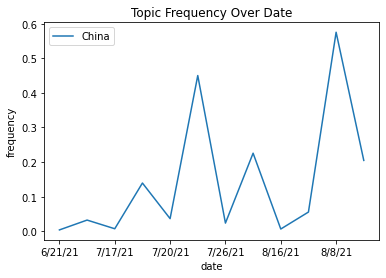

In [149]:
import matplotlib.pyplot as plt
spec_topic_1.plot(y='topic_0', x = 'clean_dates')
plt.ylabel('frequency')
plt.xlabel('date')
plt.legend(['China'])
plt.title('Topic Frequency Over Date')
plt.show()

In [144]:
tweet_topic_matrix_df.sort_values(by='topic_13', ascending=False).head(10)

topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6  \
24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
36  0.204852  0.000000  0.000000  0.000000  0.000000  0.021170  0.009927   
22  0.000000  0.000000  0.000000  0.000000  0.013427  0.000000  0.000000   
25  0.006603  0.005263  0.000000  0.000000  0.000000  0.002512  0.000000   
5   0.007367  0.000000  0.041097  0.000000  0.016419  0.033505  0.047518   
10  0.000000  0.002193  0.462320  0.042411  0.002678  0.000000  0.000000   
29  0.055633  0.001658  0.000000  0.000000  0.001087  0.000000  0.000000   
27  0.000000  0.000000  0.006224  0.000000  0.000789  0.002775  0.000000   
20  0.225678  0.006786  0.009124  0.004791  0.000000  0.013799  0.004486   
7   0.139479  0.000000  0.084259  0.127214  0.000000  0.000000  0.019523   

     topic_7   topic_8   topic_9  ...  topic_11  topic_12  topic_13  topic_14  \
24  0.000000  0.000000  0.000000  ...  0.000000  0.000000  1.020812  0.000000   
36  0.000000  0.027735  0.028491  ...  0.000000  0.033539  0.117754  0.000000   
22  0.000000  0.011181  0.000000  ...  0.234979  0.336399  0.037935  0.084046   
25  0.029032  0.018814  0.011800  ...  0.000000  0.008371  0.035696  0.046836   
5   0.000000  0.000000  0.000000  ...  0.014816  0.027450  0.032396  0.000000   
10  0.007544  0.013801  0.030293  ...  0.000000  0.087523  0.022025  0.000000   
29  0.003304  0.008695  0.000000  ...  0.000000  0.000000  0.013561  0.000000   
27  0.000000  0.000000  0.000427  ...  0.034993  0.042584  0.013475  0.000000   
20  0.072959  0.030623  0.000000  ...  0.000000  0.098519  0.012069  0.038268   
7   0.005903  0.000000  0.027966  ...  0.065041  0.151199  0.012033  0.000000   

    topic_15  topic_16  topic_17  topic_18  topic_19  clean_dates  
24  0.000000  0.000000  0.000000  0.000000  0.000000      8/15/21  
36  0.005179  0.160743  0.026030  0.328197  0.020532       8/9/21  
22  0.032328  0.022798  0.103339  0.000000  0.000000       7/5/21  
25  0.000000  0.004454  0.000000  0.887295  0.000000      8/16/21  
5   0.125957  0.000000  0.026594  0.048477  0.162646      7/17/21  
10  0.000000  0.001571  0.000000  0.056152  0.039772      7/21/21  
29  0.000000  0.000000  0.000000  0.000000  0.930551      8/20/21  
27  0.030682  0.000000  0.021878  0.327940  0.528699      8/18/21  
20  0.020526  0.013889  0.081004  0.143968  0.139248      7/30/21  
7   0.013159  0.020115  0.000000  0.111850  0.000000      7/19/21  

[10 rows x 21 columns]

In [145]:
spec_topic_2 = spec_topic[['topic_13','clean_dates']]
spec_topic_2 = spec_topic_2.sort_values(by='topic_13',ascending=False)
spec_topic_3 = spec_topic_2[:12].sort_values(by='clean_dates',ascending=True)
spec_topic_3

topic_13 clean_dates
5   0.032396     7/17/21
7   0.012033     7/19/21
10  0.022025     7/21/21
14  0.000000     7/25/21
19  0.010194      7/3/21
20  0.012069     7/30/21
22  0.037935      7/5/21
24  1.020812     8/15/21
25  0.035696     8/16/21
27  0.013475     8/18/21
29  0.013561     8/20/21
36  0.117754      8/9/21

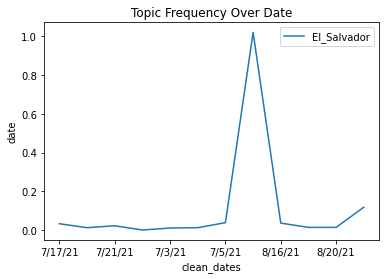

In [147]:
import matplotlib.pyplot as plt
spec_topic_3.plot(y='topic_13', x = 'clean_dates')
plt.ylabel('frequency')
plt.ylabel('date')
plt.legend(['El_Salvador'])
plt.title('Topic Frequency Over Date')
plt.show()